In [42]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import os 
os.chdir(r"C:\Users\justw\Downloads\Deep Learning\NLP") #Location Path my laptop

In [44]:
data=pd.read_csv("farmer.csv")
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,BeantMrahar,NaN,Twitter for Android,NaN,2021-04-12 03:13:34,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False
1,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:32,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
2,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:21,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,2021-04-12 03:13:21,False,628,"If we lose this fight, first we will become co...",0,False
4,__Argha__,NaN,Twitter for Android,NaN,2021-04-12 03:13:18,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False


In [45]:
data=pd.DataFrame(data.text)

data.head()

,text
0,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...
1,Delhi police is the Black Hand of BJP \n#Delhi...
2,Delhi police is the Black Hand of BJP \n#Delhi...
3,"If we lose this fight, first we will become co..."
4,'Disgraceful' and 'Discourteous' act of Delhi ...


In [46]:
data.iloc[991,0]  # [row index , column index ]

'Delhi police arresting people from Punjab that does belong to their jurisdiction. Is Punjab Govt sleeping?… https://t.co/CNTIUpPXBO'

# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [47]:
data.text=data.text.str.lower()

In [48]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… https://t.co/cntiuppxbo'

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [49]:
data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… '

# Step 2 :- Punctuation

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [52]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… '

In [53]:
data.text=data.text.apply(lambda x : remove_punctuation(x))  # x = Text 

In [54]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… '

# Remove Number

In [55]:
data.iloc[57,0]

'bhupinderq33n tractor2twitr gillsukhmani111 navdeepsingh77 harshkumarbhal1 monicagill1 mahuamoitra… '

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [56]:
data['text'] = data['text'].str.replace('\d+','')  # data.text  or data['text']

In [57]:
data.iloc[57,0]

'bhupinderqn tractortwitr gillsukhmani navdeepsingh harshkumarbhal monicagill mahuamoitra… '

# Removing Stop Words

In [58]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… '

In [60]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [61]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

# Common Words

* manually created as per the case study

In [62]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

In [63]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justw\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'haustorium',
 'pacification',
 'ceruminiferous',
 'Mytilus',
 'heterodontism',
 'microsporange',
 'retheness',
 'custerite',
 'ideographic',
 'oscularity',
 'warsaw',
 'spongelet',
 'spindled',
 'palliation',
 'rebunker',
 'Gerberia',
 'assuring',
 'naturize',
 'Paracelsianism',
 'discerpibleness',
 'Etchimin',
 'beanery',
 'semidole',
 'appetite',
 'Alexius',
 'Scyld',
 'Borocaine',
 'traversal',
 'Gullah',
 'injuredly',
 'notionless',
 'counterpoint',
 'subcontrarily',
 'fruitery',
 'coaching',
 'sophoria',
 'accrescent',
 'antiliquor',
 'insatiated',
 'Myrtales',
 'sprightliness',
 'unexotic',
 'encake',
 'Suyog',
 'uncircumspectness',
 'vastidity',
 'abide',
 'mimer',
 'frequentation',
 'tubule',
 'unagitated',
 'peristyle',
 'celioncus',
 'concubinarian',
 'crambambuli',
 'tintinnabulism',
 'federate',
 'stickwork',
 'cogitative',
 'teletactile',
 'Machairodus',
 'plectognath',
 'Gesnera',
 'barkentine',
 'considering',
 'Clyde',
 'Protophyta',
 'Diau',
 'scolytid',
 'overattent

In [64]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [65]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

# Stemming 

import nltk
#let's import the libraries
from nltk.stem.snowball import SnowballStemmer

# the most commonly used stemmer
ss = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def SnowballStemmer_text(text):
    return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

data.head()

data['text'] = data.text.apply(lambda x :' '.join(SnowballStemmer_text(x)))
data.head()

# Lemmatization

In [66]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\justw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [68]:
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

In [69]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

# Strip extra whitespace

In [70]:
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

In [71]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

###  Finished Data Cleaning

# Term Document Matrix

In [72]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,freq
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,freq
0,abduct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,abuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
651,torture,221
611,support,87
593,stand,86
599,stop,80
47,beat,65
553,shame,62
662,try,57
244,firm,52
331,intimidate,51
169,desperation,51


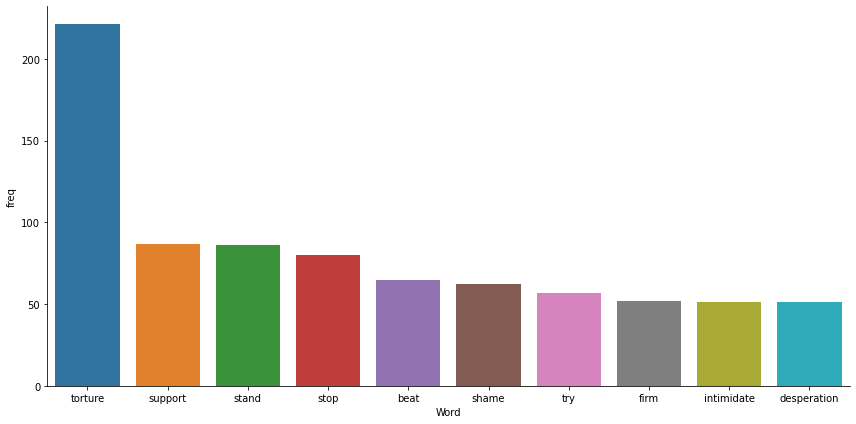

In [76]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=50] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud 

In [77]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 27192 words in the combination of all review.


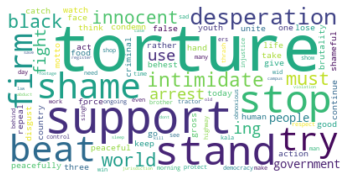

In [78]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis 

In [79]:
data

,text
0,today
1,black hand
2,black hand
3,lose fight first become corporate eventually c...
4,disgraceful discourteous act towards whose str...
...,...
995,yesterday say khet tell tractor mein nee lea
996,abduct torture innocent
997,support use maximum
998,people give tough government


In [80]:
data = data.drop_duplicates('text') 
data

,text
0,today
1,black hand
3,lose fight first become corporate eventually c...
4,disgraceful discourteous act towards whose str...
5,shameful disgust act
...,...
990,good morning food
993,today tweet
995,yesterday say khet tell tractor mein nee lea
997,support use maximum


In [81]:
#pip install textblob

In [82]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['text'].apply(pol)
data.head(5)

,text,polarity
0,today,0.000000
1,black hand,-0.166667
3,lose fight first become corporate eventually c...,0.125000
4,disgraceful discourteous act towards whose str...,-0.650000
5,shameful disgust act,0.000000


In [83]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,today,0.000000,Positive
1,black hand,-0.166667,Negative
3,lose fight first become corporate eventually c...,0.125000,Positive
4,disgraceful discourteous act towards whose str...,-0.650000,Negative
5,shameful disgust act,0.000000,Positive


<AxesSubplot:>

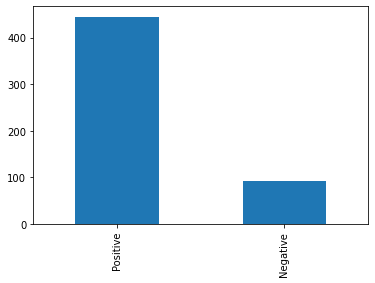

In [84]:
data.Sentiment.value_counts().plot.bar()

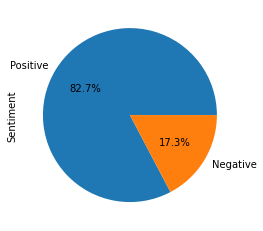

In [85]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

# Finish

# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word') 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data.text)
feature_names = cv.get_feature_names()  ## EVERY WORD NAME
abc=tfidf_vectorizer_vectors.transpose()

output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names)
output.reset_index(inplace=True)
output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
output

output['TF*IDF'] = output.max(axis=1)
output=output[["Word","TF*IDF"]] #SUBSET OF 2 COLUMNS
output.sort_values(by='TF*IDF',ascending=False,inplace=True) # SORTING DATA 
output.head(20)